# Iris species classification
In this notebook I'll try to classify this classic dataset, using some of the most common classification algorithms, such as RandomForest, Logistic Regression, Naive Bayes, Decision Trees, Support Vector Machines (SVM), K-Nearest Neighbors (KNN). The accuracy will be the metric of test.

# Summary
* About the data;
* Importing libraries;
* EDA;
* Feature engineering;
* Modelling;
* Tuning;
* Results.

# About the data

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

| Columns         | Description      | 
|------------------|:----------------:|
| Id                | Id from every sample. |
| SepalLengthCm     | Sepal length in cm. |
| SepalWidthCm      | Sepal width in cm. |
| PetalLengthCm     | Petal length in cm. |
| PetalWidthCm      | Petal width in cm. |
| Species           | Species (this is the target that I want to predict) |

# Importing Libraries
Every library that I'll be using through this notebook will be down here.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot charts
import seaborn as sns # better plots
from sklearn.preprocessing import LabelEncoder # encoder for the categorical label
from sklearn.model_selection import train_test_split # split the data into X & y
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# EDA

In [2]:
# creating the dataset
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset doesn't have any null value and the target variables is a object type. So I'll do a label encoder to transform it in numerical variable.

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


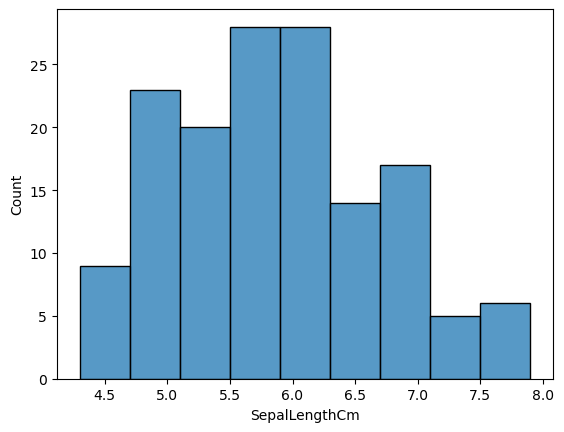

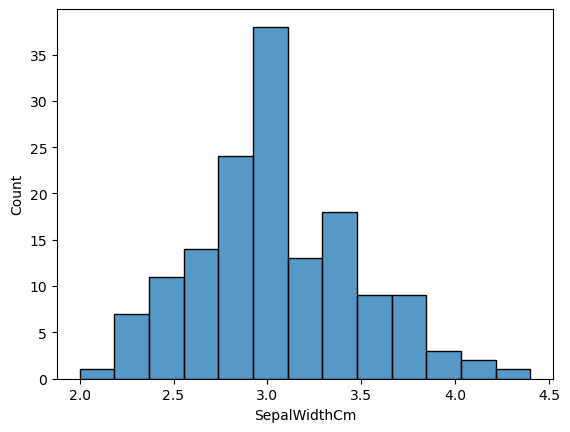

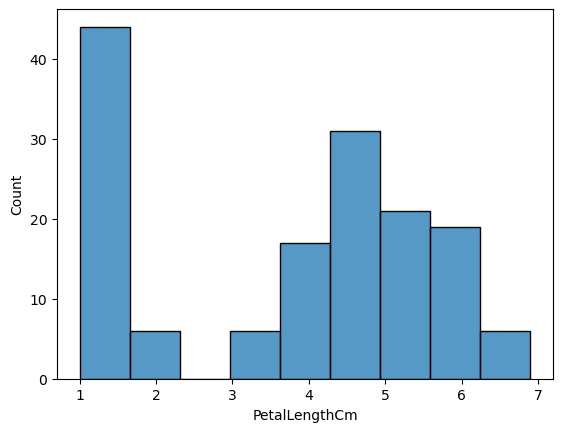

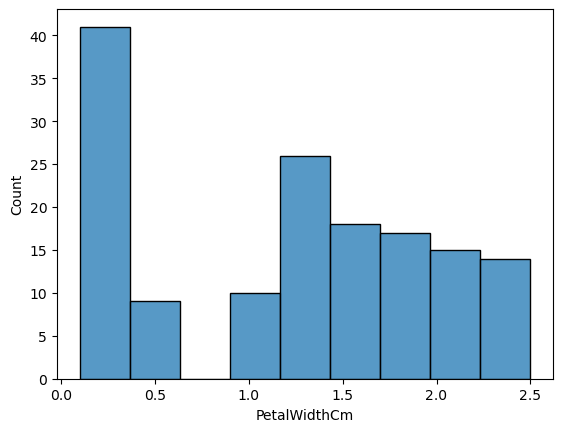

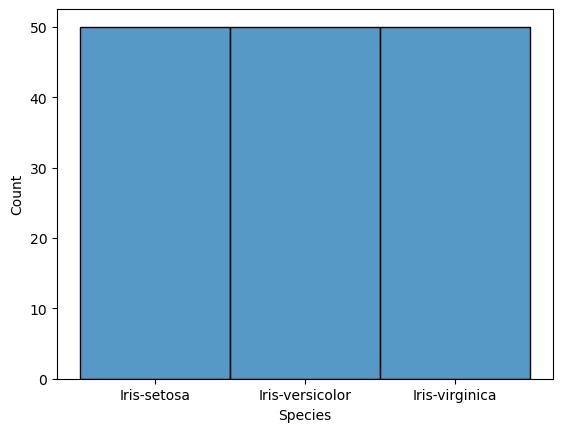

In [5]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

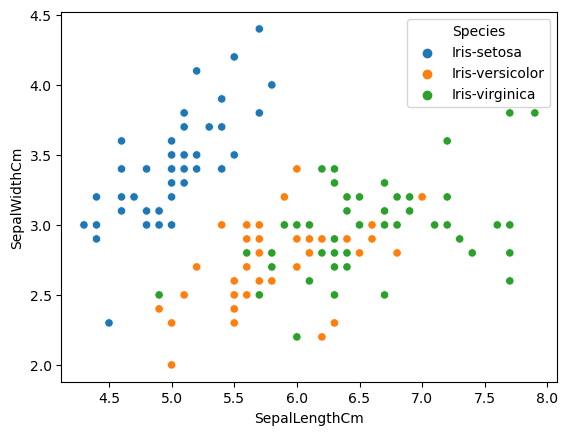

In [6]:
sns.scatterplot(df, 
                x='SepalLengthCm', 
                y='SepalWidthCm',
                hue='Species')
plt.show()

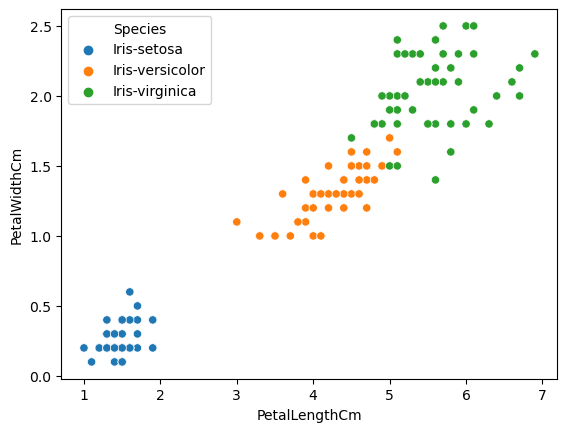

In [7]:
sns.scatterplot(df, 
                x='PetalLengthCm', 
                y='PetalWidthCm',
                hue='Species')
plt.show()

/tmp/ipykernel_20/4261252053.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


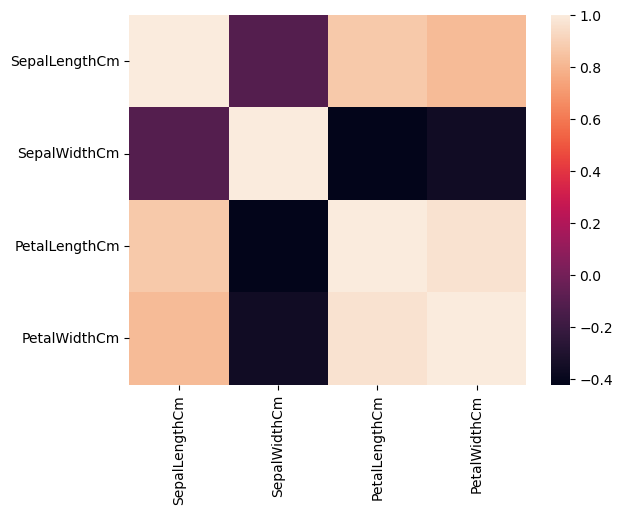

In [8]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr)
plt.show()

Every feature has at least one higher correlation between each other but SepalWidthCm, but higher SepalWidthCm tends to be a Iris Setosa, so I don't think I can drop it off.

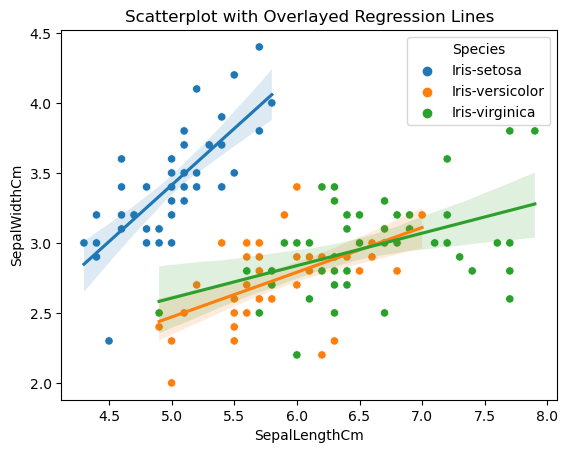

In [9]:
# Create a scatterplot with hue for different species
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# Overlay regression lines for each species
sns.regplot(data=df[df['Species']=='Iris-setosa'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)
sns.regplot(data=df[df['Species']=='Iris-versicolor'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)
sns.regplot(data=df[df['Species']=='Iris-virginica'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)

plt.title('Scatterplot with Overlayed Regression Lines')
plt.legend(title='Species')
plt.show()

The data appears to be linear, so I can use a greater variety of models.

# Feature enginnering
I'll just do a feature encoding on the Species target

In [10]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target data using the label encoder
encoded_target = label_encoder.fit_transform(df['Species'])

# Switching the df with the encoded target
df['Encoded_species'] = encoded_target
df.drop('Species', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Modelling
Now, I'll split in train and test sets the data and then make a function of accuracy and another for train and test models.

In [11]:
# Splitting the data into X & y
X = df.drop('Encoded_species', axis=1)
y = df['Encoded_species']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=0)

In [12]:
model_dict = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Multinomial Nayve Bayes': MultinomialNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=0),
    'Support Vector Machine(SVC)': SVC(random_state=0),
    'KNN': KNeighborsClassifier()
}

def train_models(model_dict, X_train, y_train):
    trained_models = {}  # Create a dictionary to store trained models

    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        trained_models[name] = model  # Store the trained model

    return trained_models

In [13]:
def measure_accuracy_score(trained_models, X_train, y_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    for name, model in trained_models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Print average cross-validation score
        print(f"Average Cross-Validation Accuracy for {name}: {scores.mean():.2f}%")

In [14]:
# Call the function to train all models
trained_models = train_models(model_dict, X_train, y_train)

# Call the function to measure accuracy of all models
measure_accuracy_score(trained_models, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Cross-Validation Accuracy for Logistic Regression: 0.93%
Average Cross-Validation Accuracy for Random Forest Classifier: 0.98%
Average Cross-Validation Accuracy for Multinomial Nayve Bayes: 0.76%
Average Cross-Validation Accuracy for Decision Tree Classifier: 0.93%
Average Cross-Validation Accuracy for Support Vector Machine(SVC): 0.89%
Average Cross-Validation Accuracy for KNN: 0.93%


The Random Forest Classifier almost did 98% of accuracy here on the Cross validation set, so I'll try to tunning it and see if I can get any better result.

# Tuning
So now I'll try to tuning the Random Forest Classifier model using GridSearchCV.

In [15]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,        # Number of cross-validation folds
    n_jobs=-1    # Use all available CPU cores for parallel computation
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')
print(f'Best estimator: {best_estimator}')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.9619047619047618
Best estimator: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)


Now, with the bests parameters found, I'll fit a model and measure it on the X_test and y_test data.

In [16]:
model = RandomForestClassifier(max_depth=None, 
                               min_samples_leaf=4,
                               min_samples_split=10, 
                               n_estimators=150)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy:.2f}%')

Random Forest Accuracy: 0.98%


# Results
So the best model gets 98% of accuracy in predict the species, the higher percentage is probably because this is a small dataset with just a few features.